In [1]:
import numpy  as np
import math
import matplotlib.pyplot as plt
import random
import os

In [2]:
# Function 1
def func_1():
    return

# Function 2
def func_2():
    return

func_1()


In [3]:
ls = [0,1]
ls[-2]

0

In [4]:
# Function 1
def func_1():
    return

# Function 2
def func_2():
    return

# Function: Initialize Variables
def initial_population(population_size = 5, min_values = [-1,-10], max_values = [1,10], list_of_functions = [func_1, func_2]):
    population = np.zeros((population_size, len(min_values) + len(list_of_functions)))
    #print(list_of_functions)
    for i in range(0, population_size):
        #print(population)
        for j in range(0, len(min_values)):
             population[i,j] = random.uniform(min_values[j], max_values[j])      
        for k in range (1, len(list_of_functions) + 1):
            population[i,-k] = list_of_functions[-k](list(population[i,0:population.shape[1]-len(list_of_functions)]))
            #continue
    return population
#initial_population()

In [5]:
# Function: Dominance
def dominance_function(solution_1, solution_2, number_of_functions = 2):
    count = 0
    dominance = True
    for k in range (1, number_of_functions + 1):
        if (solution_1[-k] >= solution_2[-k]):
            count = count + 1
    if (count == number_of_functions):
        dominance = True
    else:
        dominance = False       
    return dominance

In [6]:
def raw_fitness_function(population, number_of_functions = 2):    
    strength = np.zeros((population.shape[0], 1))
    print("shape",population.shape[0])
    raw_fitness = np.zeros((population.shape[0], 1))
    for i in range(0, population.shape[0]):
        for j in range(0, population.shape[0]):
            if(i != j):
                print("fungsi",population[i,:],population[j,:])
                if dominance_function(solution_1 = population[i,:], solution_2 = population[j,:], number_of_functions = number_of_functions):
                    strength[i,0] = strength[i,0] + 1

    for i in range(0, population.shape[0]):
        for j in range(0, population.shape[0]):
            if(i != j):
                if dominance_function(solution_1 = population[i,:], solution_2 = population[j,:], number_of_functions = number_of_functions):
                    raw_fitness[j,0] = raw_fitness[j,0] + strength[i,0]
    return raw_fitness

In [7]:
# Function: Distance Calculations
def euclidean_distance(x, y):       
    distance = 0
    for j in range(0, len(x)):
        distance = (x[j] - y[j])**2 + distance   
    return distance**(1/2) 

1.4142135623730951

In [8]:
# Function: Fitness
def fitness_calculation(population, raw_fitness, number_of_functions = 2):
    k = int(len(population)**(1/2)) - 1
    fitness  = np.zeros((population.shape[0], 1))
    distance = np.zeros((population.shape[0], population.shape[0]))
    for i in range(0, population.shape[0]):
        for j in range(0, population.shape[0]):
            if(i != j):
                x = np.copy(population[i, population.shape[1]-number_of_functions:])
                y = np.copy(population[j, population.shape[1]-number_of_functions:])
                distance[i,j] =  euclidean_distance(x = x, y = y)                    
    for i in range(0, fitness.shape[0]):
        distance_ordered = (distance[distance[:,i].argsort()]).T
        #print("distance_ordered",distance_ordered)
        fitness[i,0] = raw_fitness[i,0] + 1/(distance_ordered[i,k] + 2)
    return fitness

In [9]:
# Function: Sort Population by Fitness
def sort_population_by_fitness(population, fitness):
    idx = np.argsort(fitness[:,-1])
    
    fitness_new = np.zeros((population.shape[0], 1))
    population_new = np.zeros((population.shape[0], population.shape[1]))
    print("shape[1]",population.shape[1])

    for i in range(0, population.shape[0]):
        fitness_new[i,0] = fitness[idx[i],0] 

        for k in range(0, population.shape[1]):
            population_new[i,k] = population[idx[i],k]

    return population_new, fitness_new

In [10]:
# Function: Selection
def roulette_wheel(fitness_new): 
    fitness = np.zeros((fitness_new.shape[0], 2))

    for i in range(0, fitness.shape[0]):
        fitness[i,0] = 1/(1+ fitness[i,0] + abs(fitness[:,0].min()))
    fit_sum = fitness[:,0].sum()
    fitness[0,1] = fitness[0,0]

    for i in range(1, fitness.shape[0]):
        fitness[i,1] = (fitness[i,0] + fitness[i-1,1])

    for i in range(0, fitness.shape[0]):
        fitness[i,1] = fitness[i,1]/fit_sum
        
    ix = 0
    random = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
    
    for i in range(0, fitness.shape[0]):
        if (random <= fitness[i, 1]):
          ix = i
          break
    return ix

In [11]:
# Function: Offspring
def breeding(population, fitness, min_values = [-5,-5], max_values = [5,5], mu = 1, list_of_functions = [func_1, func_2]):
    offspring = np.copy(population)
    b_offspring = 0
    for i in range (0, offspring.shape[0]):
        parent_1, parent_2 = roulette_wheel(fitness), roulette_wheel(fitness)
        while parent_1 == parent_2:
            parent_2 = random.sample(range(0, len(population) - 1), 1)[0]
            
        for j in range(0, offspring.shape[1] - len(list_of_functions)):
            rand = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            rand_b = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)                                
            if (rand <= 0.5):
                b_offspring = 2*(rand_b)
                b_offspring = b_offspring**(1/(mu + 1))
            elif (rand > 0.5):  
                b_offspring = 1/(2*(1 - rand_b))
                b_offspring = b_offspring**(1/(mu + 1))       
            offspring[i,j] = np.clip(((1 + b_offspring)*population[parent_1, j] + (1 - b_offspring)*population[parent_2, j])/2, min_values[j], max_values[j])           
            if(i < population.shape[0] - 1):   
                offspring[i+1,j] = np.clip(((1 - b_offspring)*population[parent_1, j] + (1 + b_offspring)*population[parent_2, j])/2, min_values[j], max_values[j]) 
        for k in range (1, len(list_of_functions) + 1):
            offspring[i,-k] = list_of_functions[-k](offspring[i,0:offspring.shape[1]-len(list_of_functions)])
    return offspring


In [12]:
# Function: Mutation
def mutation(offspring, mutation_rate = 0.1, eta = 1, min_values = [-5,-5], max_values = [5,5], list_of_functions = [func_1, func_2]):
    d_mutation = 0            
    for i in range (0, offspring.shape[0]):
        for j in range(0, offspring.shape[1] - len(list_of_functions)):
            probability = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
            if (probability < mutation_rate):
                rand = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)
                rand_d = int.from_bytes(os.urandom(8), byteorder = "big") / ((1 << 64) - 1)                                     
                if (rand <= 0.5):
                    d_mutation = 2*(rand_d)
                    d_mutation = d_mutation**(1/(eta + 1)) - 1
                elif (rand > 0.5):  
                    d_mutation = 2*(1 - rand_d)
                    d_mutation = 1 - d_mutation**(1/(eta + 1))                
                offspring[i,j] = np.clip((offspring[i,j] + d_mutation), min_values[j], max_values[j])                        
        for k in range (1, len(list_of_functions) + 1):
            offspring[i,-k] = list_of_functions[-k](offspring[i,0:offspring.shape[1]-len(list_of_functions)])
    return offspring

In [13]:
# SPEA-2 Function
def strength_pareto_evolutionary_algorithm_2(population_size = 10, archive_size = 5, mutation_rate = 0.1, min_values = [-5,-5], max_values = [5,5], list_of_functions = [func_1, func_2], generations = 50, mu = 1, eta = 1):        

    count = 0   

    # step 1

    population = initial_population(population_size = population_size, min_values = min_values, max_values = max_values, list_of_functions = list_of_functions) 
    archive = initial_population(population_size = archive_size, min_values = min_values, max_values = max_values, list_of_functions = list_of_functions)     


    while (count <= generations):       
        print("Generation = ", count)

        # step 2 penggabungan

        population = np.vstack([population, archive])

        # step 3 ngitung fitness
        raw_fitness   = raw_fitness_function(population, number_of_functions = len(list_of_functions))
        print("raw_fitness",raw_fitness)                
        fitness    = fitness_calculation(population, raw_fitness, number_of_functions = len(list_of_functions))

        # Step 4 sortir by fitness
        population, fitness = sort_population_by_fitness(population, fitness)
        print("pop1",population)
        print("f1",fitness)
        population, archive, fitness = population[0:population_size,:], population[0:archive_size,:], fitness[0:archive_size,:]
        print("fitness",fitness)        
        print("pop2",population)    

        # step 5 generate offspring    
        population = breeding(population, fitness, mu = mu, min_values = min_values, max_values = max_values, list_of_functions = list_of_functions)
        print("pop3",population)        
        population = mutation(population, mutation_rate = mutation_rate, eta = eta, min_values = min_values, max_values = max_values, list_of_functions = list_of_functions)    
        print("ARc",archive)
        count = count + 1              
    return archive

Generation =  0
shape 50
fungsi [   512.63219129 262791.76354792 260745.23478275] [ -91.63865762 8397.64357009 8768.19820057]
fungsi [   512.63219129 262791.76354792 260745.23478275] [ -143.5256944  20599.62495378 21177.72773139]
fungsi [   512.63219129 262791.76354792 260745.23478275] [  185.77109018 34510.89794565 33771.81358495]
fungsi [   512.63219129 262791.76354792 260745.23478275] [   969.96597421 940833.99111575 936958.12721893]
fungsi [   512.63219129 262791.76354792 260745.23478275] [   814.10774025 662771.41273088 659518.98176989]
fungsi [   512.63219129 262791.76354792 260745.23478275] [  307.93497135 94823.94657795 93596.20669257]
fungsi [   512.63219129 262791.76354792 260745.23478275] [   370.77661114 137475.29536489 135996.18892034]
fungsi [   512.63219129 262791.76354792 260745.23478275] [-22.39699785 501.62551262 595.21350402]
fungsi [   512.63219129 262791.76354792 260745.23478275] [-15.96760927 254.96454577 322.83498284]
fungsi [   512.63219129 262791.76354792 26074

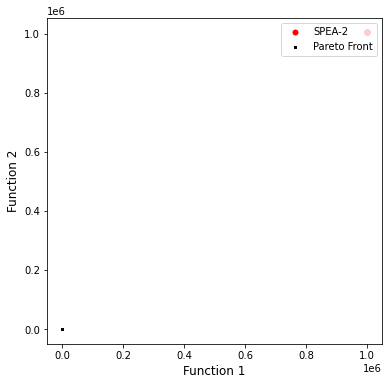

In [31]:
######################## Part 1 - Usage ####################################

# Schaffer Function 1
def schaffer_f1(variables_values = [0]):
    y = variables_values[0]**2
    return y

# Schaffer Function 2
def schaffer_f2(variables_values = [0]):
    y = (variables_values[0]-2)**2
    return y

# Calling SPEA-2 Function
spea_2_schaffer = strength_pareto_evolutionary_algorithm_2(population_size = 25, archive_size = 25, mutation_rate = 0.1, min_values = [-1000], max_values = [1000], list_of_functions = [schaffer_f1, schaffer_f2], generations = 10, mu = 1, eta = 1)

# schaferr = jumlah archive
print("schaffer",spea_2_schaffer)

# Shaffer Pareto Front
schaffer = np.zeros((5, 3))
x = np.arange(0.0, 2.0, 0.01)
for i in range (0, schaffer.shape[0]):
    schaffer[i,0] = x[i]
    schaffer[i,1] = schaffer_f1(variables_values = [schaffer[i,0]])
    schaffer[i,2] = schaffer_f2(variables_values = [schaffer[i,0]])

schaffer_1 = schaffer[:,1]
schaffer_2 = schaffer[:,2]

# Graph Pareto Front Solutions
func_1_values = spea_2_schaffer[:,-2]
func_2_values = spea_2_schaffer[:,-1]
ax1 = plt.figure(figsize = (6,6)).add_subplot(111)
plt.xlabel('Function 1', fontsize = 12)
plt.ylabel('Function 2', fontsize = 12)
ax1.scatter(func_1_values, func_2_values, c = 'red',   s = 25, marker = 'o', label = 'SPEA-2')
ax1.scatter(schaffer_1,    schaffer_2,    c = 'black', s = 2,  marker = 's', label = 'Pareto Front')
plt.legend(loc = 'upper right')
plt.show()

In [32]:
from pymoo.algorithms.so_pattern_search import PatternSearch
from pymoo.factory import get_problem
from pymoo.optimize import minimize

problem = get_problem("ackley", n_var=30)
print(problem)
algorithm = PatternSearch()

res = minimize(problem,
               algorithm,
               seed=1,
               verbose=True)

print("Best solution found: \nX = %s\nF = %s" % (res.X, res.F))

# name: Ackley
# n_var: 30
# n_obj: 1
# n_constr: 0
# f(xl): 21.570311151282485
# f((xl+xu)/2): 4.440892098500626e-16
# f(xu): 21.570311151282485


Compiled modules for significant speedup can not be used!
https://pymoo.org/installation.html#installation

To disable this warning:
from pymoo.configuration import Configuration
Configuration.show_compile_hint = False

n_gen |  n_eval |     fopt     |    delta    
    1 |     150 |  2.07242E+01 |  0.250000000
    2 |     258 |  1.73176E+01 |  0.125000000
    3 |     371 |  1.19990E+01 |  0.062500000
    4 |     480 |  6.691999557 |  0.031250000
    5 |     593 |  4.217183223 |  0.015625000
    6 |     705 |  3.022213443 |  0.007812500
    7 |     813 |  1.622057902 |  0.003906250
    8 |     922 |  0.689752457 |  0.001953125
    9 |    1031 |  0.169017578 |  0.000976562
   10 |    1143 |  0.096961231 |  0.000488281
   11 |    1249 |  0.039341265 |  0.000244141
   12 |    1360 |  0.020167674 |  0.000122070
   13 |    1468 |  0.008760261 |  

In [29]:
######################## Part 2 - Usage ####################################

# Kursawe Function 1
def kursawe_f1(variables_values = [0, 0]):
    f1 = 0
    if (len(variables_values) == 1):
        f1 = f1 - 10 * math.exp(-0.2 * math.sqrt(variables_values[0]**2 + variables_values[0]**2))
    else:
        for i in range(0, len(variables_values)-1):
            f1 = f1 - 10 * math.exp(-0.2 * math.sqrt(variables_values[i]**2 + variables_values[i + 1]**2))
    return f1

# Kursawe Function 2
def kursawe_f2(variables_values = [0, 0]):
    f2 = 0
    for i in range(0, len(variables_values)):
        f2 = f2 + abs(variables_values[i])**0.8 + 5 * math.sin(variables_values[i]**3)
    return f2

# Calling SPEA-2 Function
spea_2_kursawe = strength_pareto_evolutionary_algorithm_2(population_size = 50, archive_size = 50, mutation_rate = 0.1, min_values = [-5,-5], max_values = [5,5], list_of_functions = [kursawe_f1, kursawe_f2], generations = 100, mu = 1, eta = 1)

# Kursawe Pareto Front
kursawe = np.zeros((10000, 4))
x = np.arange(-5, 5, 0.1)
count = 0
for j in range (0,100):
    for k in range (0, 100):
            kursawe[count,0] = x[j]
            kursawe[count,1] = x[k]
            count = count + 1
        
for i in range (0, kursawe.shape[0]):
    kursawe[i,2] = kursawe_f1(variables_values = [kursawe[i,0], kursawe[i,1]])
    kursawe[i,3] = kursawe_f2(variables_values = [kursawe[i,0], kursawe[i,1]])

kursawe_1 = kursawe[:,2]
kursawe_2 = kursawe[:,3]

# Graph Pareto Front Solutions
func_1_values = spea_2_kursawe[:,-2]
func_2_values = spea_2_kursawe[:,-1]
ax1 = plt.figure(figsize = (6,6)).add_subplot(111)
plt.xlabel('Function 1', fontsize = 12)
plt.ylabel('Function 2', fontsize = 12)
ax1.scatter(func_1_values, func_2_values, c = 'red',   s = 25, marker = 'o', label = 'SPEA-2')
#ax1.scatter(kursawe_1,     kursawe_2,     c = 'black', s = 2,  marker = 's', label = 'Solutions')
plt.legend(loc = 'upper right')
plt.show()


Generation =  0
raw_fitness [[   0.]
 [2724.]
 [1562.]
 [  66.]
 [ 382.]
 [2516.]
 [2186.]
 [ 327.]
 [1673.]
 [1189.]
 [2767.]
 [2104.]
 [1454.]
 [1441.]
 [1687.]
 [2385.]
 [ 648.]
 [1393.]
 [ 346.]
 [1673.]
 [1472.]
 [ 779.]
 [2549.]
 [2138.]
 [ 740.]
 [ 883.]
 [2405.]
 [   0.]
 [ 891.]
 [1635.]
 [2813.]
 [ 747.]
 [ 894.]
 [  85.]
 [2397.]
 [ 864.]
 [1534.]
 [ 883.]
 [ 536.]
 [1926.]
 [ 847.]
 [2242.]
 [ 239.]
 [1507.]
 [ 173.]
 [2817.]
 [   0.]
 [2581.]
 [ 175.]
 [1455.]
 [2079.]
 [1904.]
 [   0.]
 [ 282.]
 [2046.]
 [ 962.]
 [1186.]
 [2150.]
 [ 484.]
 [ 779.]
 [2385.]
 [ 992.]
 [1425.]
 [ 969.]
 [1467.]
 [ 969.]
 [2026.]
 [ 904.]
 [   0.]
 [   0.]
 [ 838.]
 [2651.]
 [ 920.]
 [1148.]
 [ 929.]
 [1848.]
 [1127.]
 [ 261.]
 [ 577.]
 [ 634.]
 [1562.]
 [ 771.]
 [2201.]
 [1163.]
 [2016.]
 [1061.]
 [ 962.]
 [1828.]
 [2401.]
 [2149.]
 [2767.]
 [1250.]
 [ 427.]
 [   0.]
 [2796.]
 [1691.]
 [1852.]
 [ 407.]
 [1386.]
 [2592.]]
fitness [[2.00959595e-01]
 [2.72426244e+03]
 [1.56236703e+03]
 [6.61911

KeyboardInterrupt: 